# Sea Level Gradient Analyses

This notebook documents gradient analyses of sea level curve by Haq and Schutter (2008). Gradients are calculated using **Numpy Gradient** package.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load digitized sea-level curve

In [6]:
ordosealevel = np.load("../Data/OrdoSeaLevel.npz")['SeaLevel']
ordoseaage = np.load("../Data/OrdoSeaLevel.npz")['age']

# flip the arrays because directions to calculate gradient matter
ordosealevel = np.flip(ordosealevel)
ordoseaage = np.flip(ordoseaage)

Maximum gradient is at 461 Ma
Sea Level inflection point is at 462 Ma


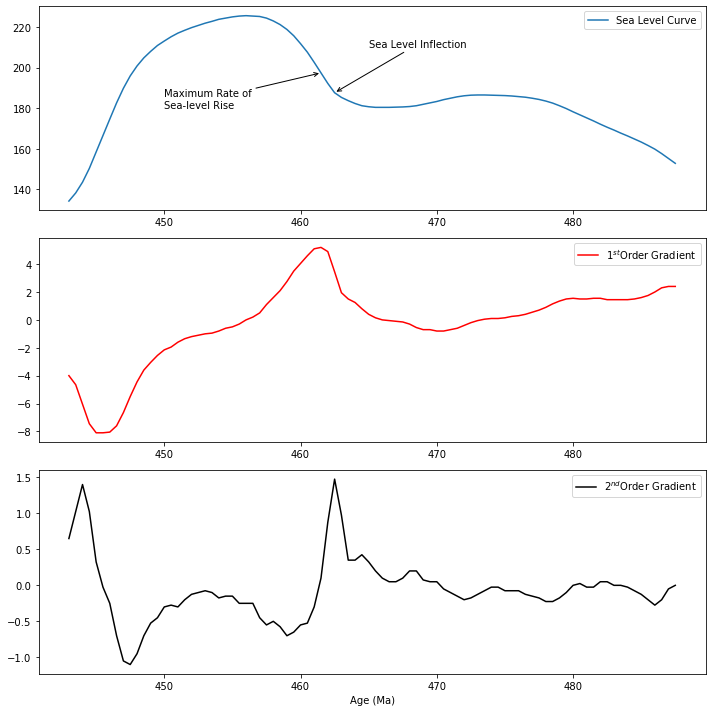

In [26]:
slgrade1 = np.gradient(ordosealevel)
slgrade2 = np.gradient(slgrade1)

max_gradient = ordoseaage[np.where(slgrade1 == slgrade1.max())]
max_gradient2 = ordoseaage[np.where(slgrade2 == slgrade2.max())]

print('Maximum gradient is at %d Ma' % max_gradient)
print('Sea Level inflection point is at %d Ma' % max_gradient2)

plt.figure(figsize=(10,10))
plt.subplot(311)
plt.plot(ordoseaage, ordosealevel, label='Sea Level Curve')
plt.legend()

plt.annotate("Maximum Rate of\nSea-level Rise",
            xy=(max_gradient, ordosealevel[np.where(slgrade1 == slgrade1.max())]), 
            xycoords='data',
            xytext=(450, 180), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )


plt.annotate("Sea Level Inflection",
            xy=(max_gradient2, ordosealevel[np.where(slgrade2 == slgrade2.max())]), 
            xycoords='data',
            xytext=(465, 210), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.subplot(312)
plt.plot(ordoseaage, slgrade1, 'r-', label=r'$1^{st}$Order Gradient')
plt.legend()

plt.subplot(313)
plt.plot(ordoseaage, slgrade2, 'k-',label=r'$2^{nd}$Order Gradient')
plt.xlabel('Age (Ma)')
plt.legend()
plt.tight_layout()
plt.savefig('../Figures/SeaLevel_Gradient.png')

In [27]:
x = np.array([1, 5, 6, 8, 15])

y = 3*x + 21

yy = np.gradient(y)

yx = np.gradient(y, x)

print(yy)
print(yx)

[12.   7.5  4.5 13.5 21. ]
[3. 3. 3. 3. 3.]
